In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
#Descargo la data 

url = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"
df = pd.read_csv(url)
df.to_csv("../data/raw/data.csv", index=False)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
#Tamaño de la data
df.shape

(48895, 16)

In [4]:
#Informacion del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

*Dimensión de la data:* El dataset tiene 48,895 filas y 16 columnas.

*Tipos de datos:*
- 7 columnas son de tipo int64.
- 3 columnas son de tipo float64.
- 6 columnas son de tipo object.

*Valores nulos:*
name, host_name, last_review y reviews_per_month tienen valores faltantes.
*Columnas con datos redundantes*
-Host_id
-Host_name
-Name
-Id
-Last_review
por ende, no nos sirven para llevar a cabo el analisis. 

*Caracteristicas numericas:*
-Price
-minimum_nights
-number_of_reviews
-availability_365
-reviews_per_month
`Datos categoricos:´
-room_type
-neighbourhood_group
-host_name
-neighbourhood



In [5]:
df.isnull().sum().sort_values(ascending=False)

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
neighbourhood_group                   0
neighbourhood                         0
id                                    0
host_id                               0
longitude                             0
latitude                              0
room_type                             0
price                                 0
number_of_reviews                     0
minimum_nights                        0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
# en porcentaje
df.isnull().sum().sort_values(ascending=False) / len(df)

last_review                       0.205583
reviews_per_month                 0.205583
host_name                         0.000429
name                              0.000327
neighbourhood_group               0.000000
neighbourhood                     0.000000
id                                0.000000
host_id                           0.000000
longitude                         0.000000
latitude                          0.000000
room_type                         0.000000
price                             0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

Aqui podemos comprobar los valores nulos que existen dentro del data set, y ahora los eliminamos. 

In [7]:
#Duplicados en el DataFrame 
duplicados= df.duplicated()
duplicados

df_duplicados = df[duplicados]
df_duplicados

df_sin_duplicados = df.drop_duplicates()
df_sin_duplicados

#Eliminar duplicados
print(f"The Name is: {df['name'].duplicated().sum()}")
print(f"The Host ID is: {df['host_id'].duplicated().sum()}")

The Name is: 989
The Host ID is: 11438


En este Dataset observamos que se han eliminado los datos nulos. Pero de igual manera observamos que existen columnas con datos que no nos sirven para nuestra recoleccion de datos. 

In [8]:
#Eliminaremos estas columnas porque no tienen datos redundantes

df_new = df.drop(["id", "host_name", "name", "host_id", "last_review", "neighbourhood","latitude", "longitude", "reviews_per_month"], axis = 1)
df_new

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,9,6,365
1,Manhattan,Entire home/apt,225,1,45,2,355
2,Manhattan,Private room,150,3,0,1,365
3,Brooklyn,Entire home/apt,89,1,270,1,194
4,Manhattan,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...
48890,Brooklyn,Private room,70,2,0,2,9
48891,Brooklyn,Private room,40,4,0,2,36
48892,Manhattan,Entire home/apt,115,10,0,1,27
48893,Manhattan,Shared room,55,1,0,6,2


In [9]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   neighbourhood_group             48895 non-null  object
 1   room_type                       48895 non-null  object
 2   price                           48895 non-null  int64 
 3   minimum_nights                  48895 non-null  int64 
 4   number_of_reviews               48895 non-null  int64 
 5   calculated_host_listings_count  48895 non-null  int64 
 6   availability_365                48895 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.6+ MB


Ahora con esta informacion vemos que ya no existen valores nulos, ni datos redundantes que no ayuden con nuestro analisis dentro del data set. Ahora podremos hacer el analisis de las variables. 

En el *Dataset* hay 8 columnas y 48.895 registros.
*Categorias principales:*
- *Neigbourhood_group* dtype:object
- *room_type* dtype:object

*Variables numericas claves:*  
-  *price*: precio del alojamiento.
-  *minimun_nights*: numero minimo de noches requeridas.
-  *number_of_reviews*: cantidad de reseñas.
-  *calculated_host_listings_count*: numero de alojamiento por anfitrion.
-  *availability_365*: dias disponibles del alojamiento en el año.

Visto el Dataset es recomendable hacer un histograma y distribuciones para detectar precios extremos, observar el precio por tipo de alojamiento, cuales son mas economicas que otras, que tipo es el mas pedido por barrio y la disponibilidad de los alojamientos en el año.

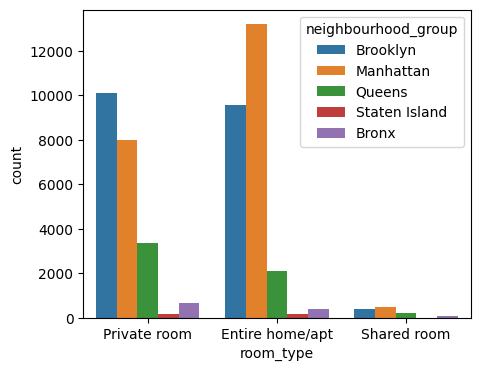

In [10]:
#Analisis de las variables categoricas

fig, axis = plt.subplots(figsize = (5, 4))
sns.countplot(data = df, x = "room_type", hue = "neighbourhood_group")
plt.show()

Con estas graficas podemos deducir dos cosas:

En primer lugar, en nuestro *neighbourhood_group* en 85% de los inmuebles estan ubicados en *Manhattan* y *Brooklyn*, siendo los otros barrios menos habituales. y segundo, en cuanto al *room_type* el 95% esta distribuido entre habitaciones privadas o pisos enteros. Las habitaciones compartidas no tienen tanta demanda. 

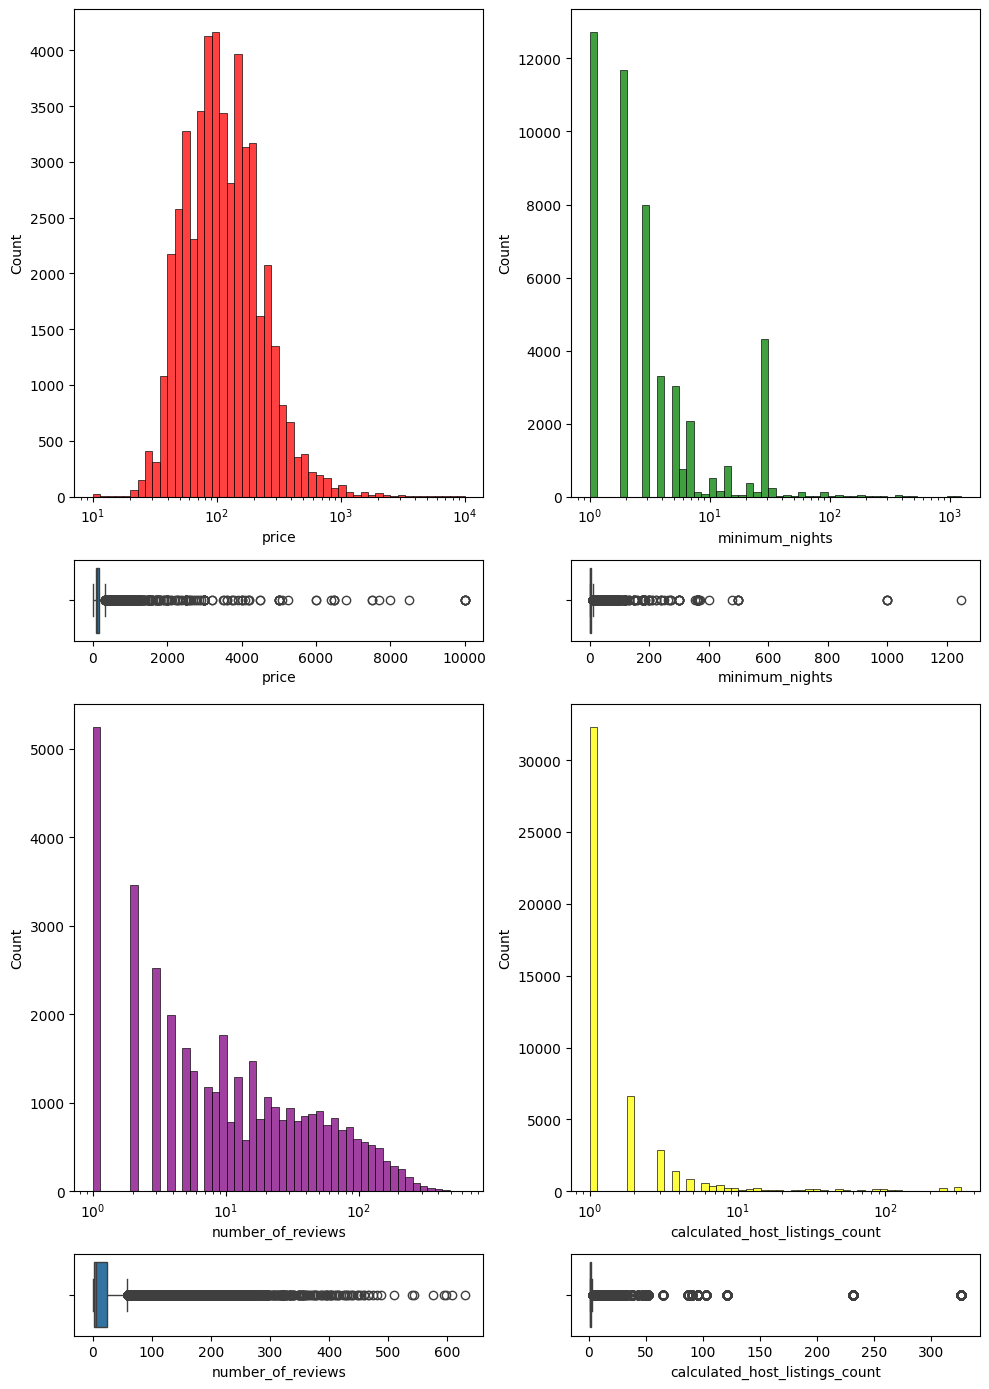

In [11]:
#ANALISIS DE LAS VARIABLES NUMERICAS
#MIS VARIABLES A CONSIDERAN SON:

fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = df, x = "price", bins= 50, color="red", log_scale=True)
sns.boxplot(ax = axis[1, 0], data = df, x = "price")

sns.histplot(ax = axis[0, 1], data = df, x = "minimum_nights", bins= 50, color="green", log_scale=True)
sns.boxplot(ax = axis[1, 1], data = df, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = df, x = "number_of_reviews", bins=50, color="purple", log_scale=True)
sns.boxplot(ax = axis[3, 0], data = df, x = "number_of_reviews")

sns.histplot(ax = axis[2,1], data = df, x = "calculated_host_listings_count", color="yellow", bins=50, log_scale=True)
sns.boxplot(ax = axis[3, 1], data = df, x = "calculated_host_listings_count")
plt.tight_layout()
plt.show()
plt.show()

CONCLUSIONES DE ANÁLISIS DE VARIABLES NUMÉRICAS

-  *price* : Podemos observar que los precios son caros y distorsionan la media, los precios de 50 a 180 son la mayoria, pero hay valores mas altos.

-  *minumum_nights* : La mayoría de los huespedes se quedan un maximo de 10 noches, pero hay un pico en 30 lo cual indicaría que podria tratarse de alquileres mensuales. Tambien hay muchos datos atipicos, podria tratarse de un error en la base de datos o manipulacion por el anfitrion.

-  *number_of_reviews* : La mayoría de los alojamientos tienen pocas reseñas, tambien hay muchos valores atipicos.

-  *calculated_host_listings_count* : La mayoría de los propietarios tienen 1 propiedad, pero tambien hay quienes tienen mas de 50, que pueden ser inmobiliarias o empresas.

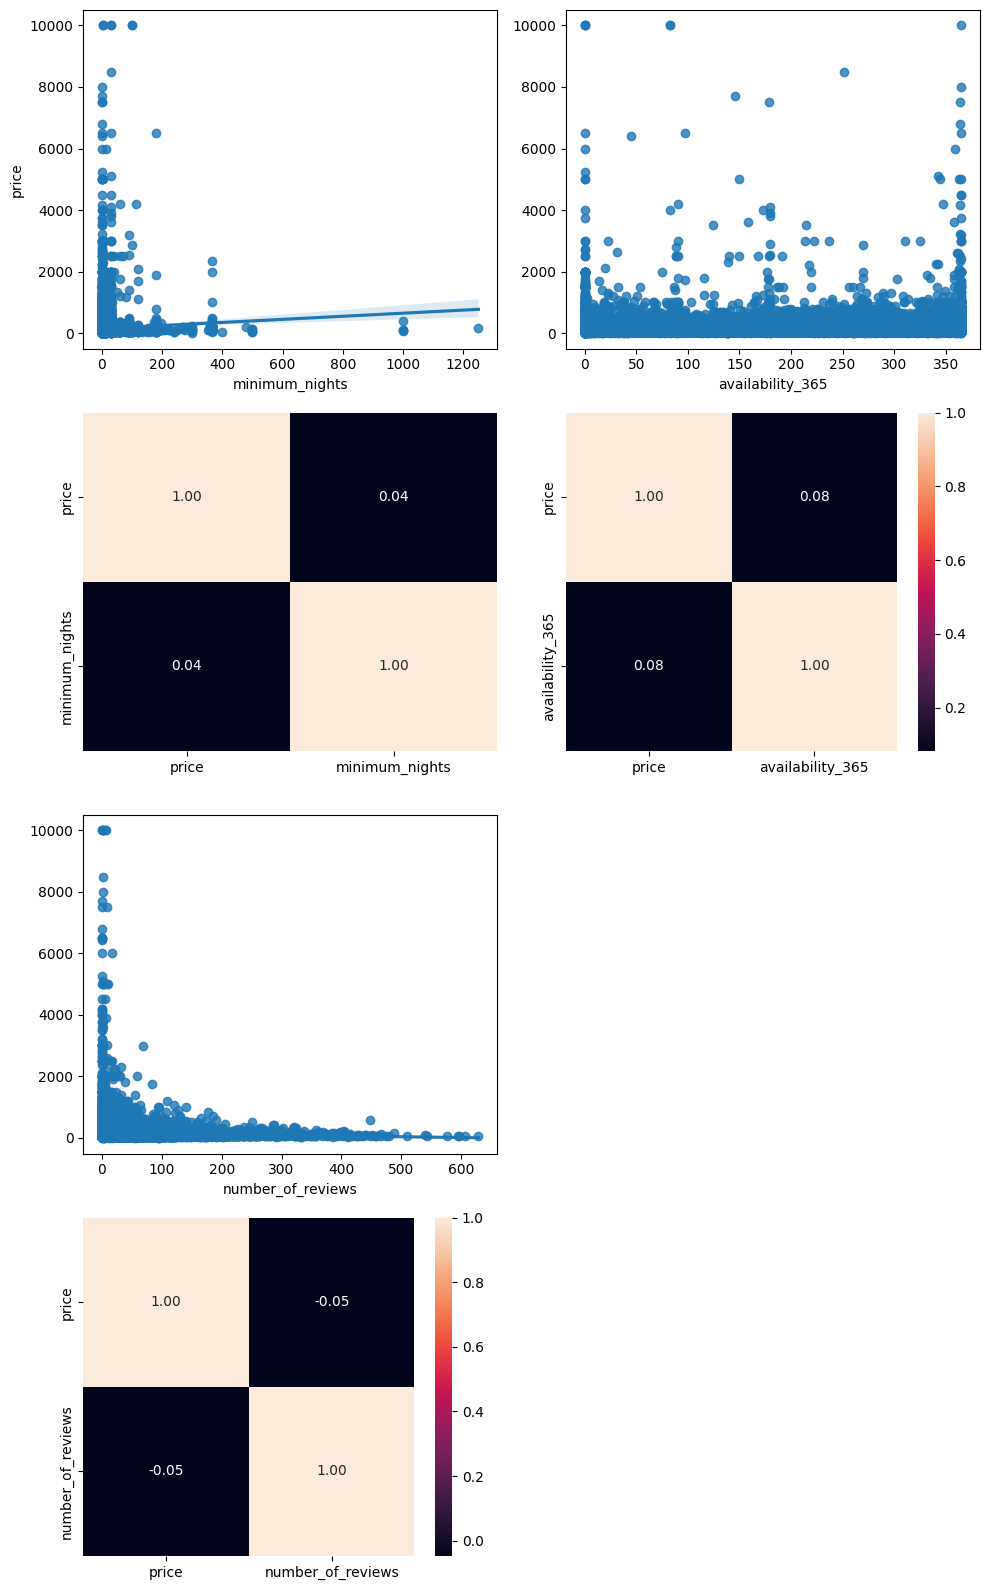

In [12]:
fig, axis = plt.subplots(4, 2, figsize = (10, 16))
sns.regplot(ax = axis[0, 0], data = df, x = "minimum_nights", y = "price")
sns.heatmap(df[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "availability_365", y = "price").set(ylabel = None)
sns.heatmap(df[["price", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = df, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(df[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)
fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])
plt.tight_layout()
plt.show()

El el diagrama de disprecion no existe relacion clara entre el precio y la estadia minima, ya que existen precios extremadamente altos.

Los mapas de calor entre el precio y la estadia minima es baja, es decir la cantidad de noches no tiene impacto en el precio. Y el tipo de alojamiento con el precio nos deja claro que los *Entire home/apt* son mas caros que los *Shared room* por logica.


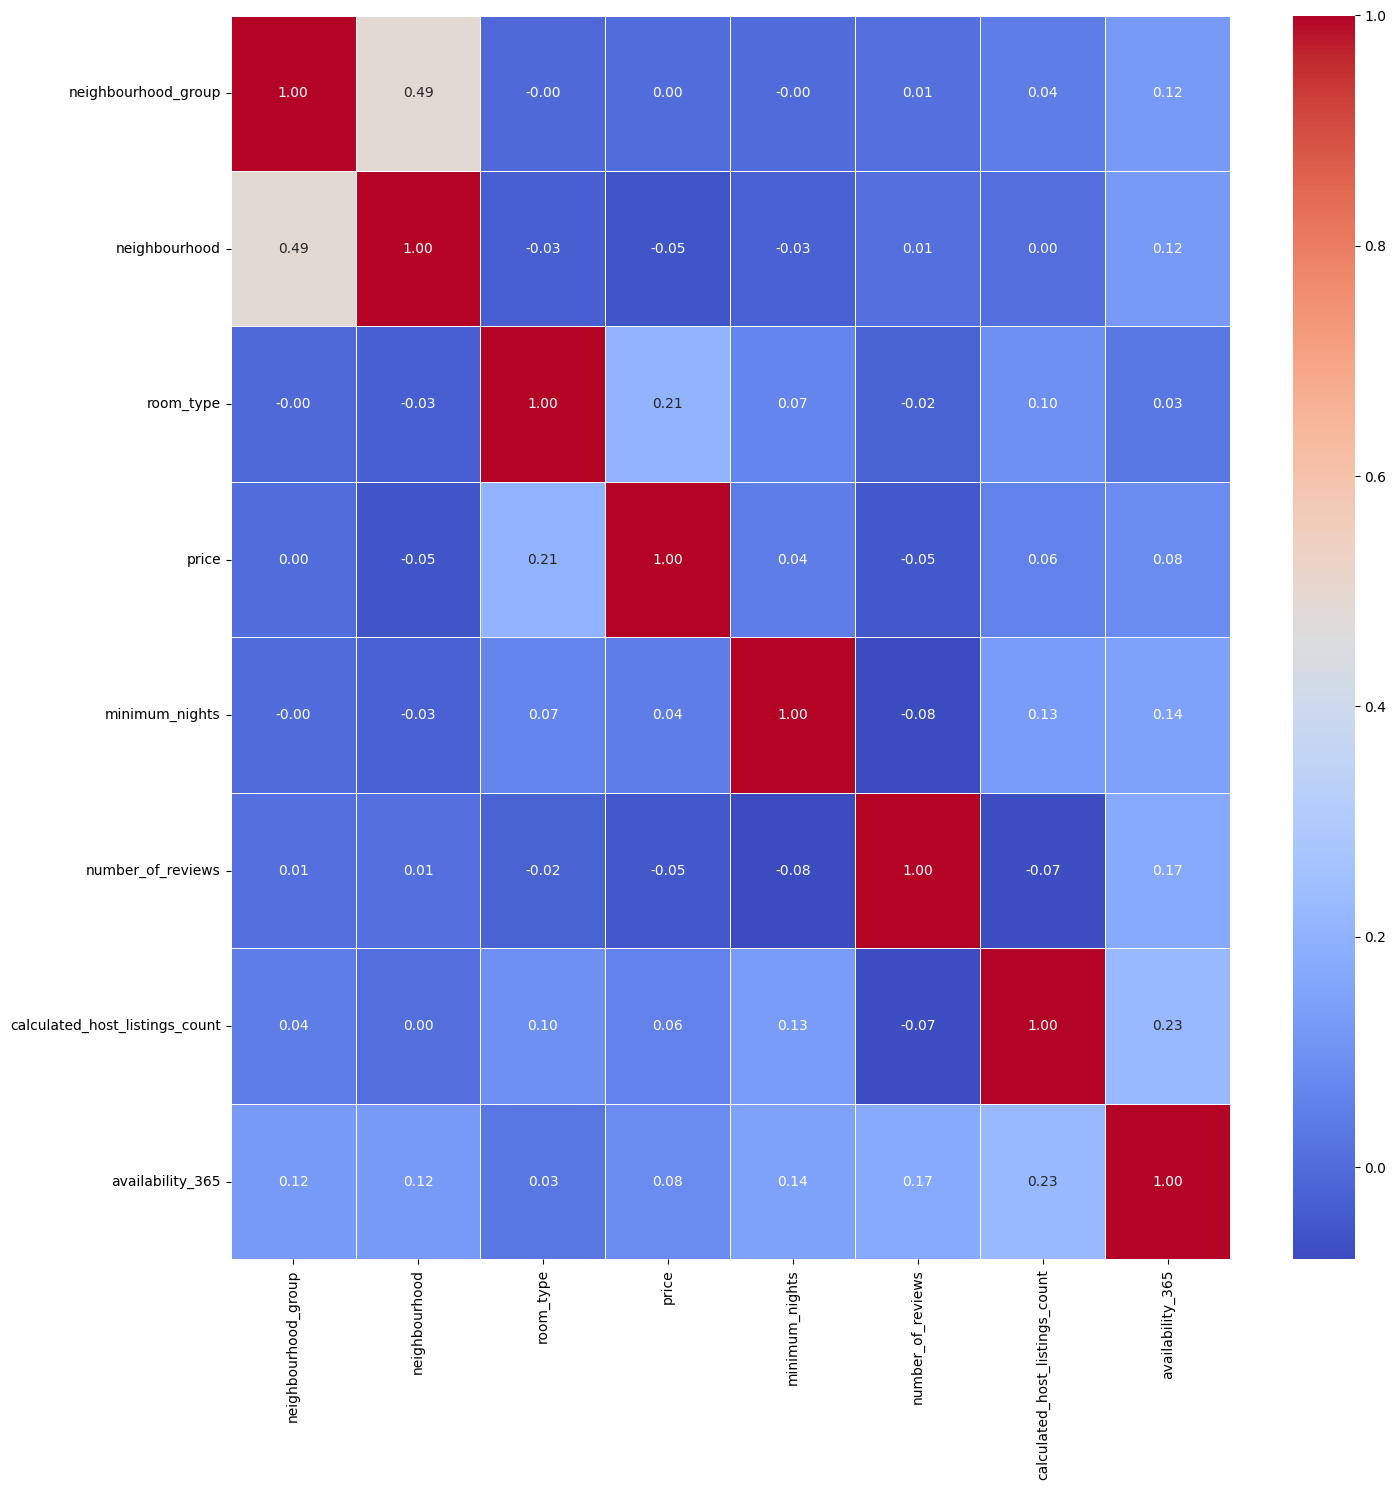

In [13]:
df["room_type"] = pd.factorize(df["room_type"])[0]
df["neighbourhood_group"] = pd.factorize(df["neighbourhood_group"])[0]
df["neighbourhood"] = pd.factorize(df["neighbourhood"])[0]

fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(df[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights",	"number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f", cmap="coolwarm", linewidths=0.5)
plt.tight_layout()
plt.show()

En el gráfico, se puede ver que la correlación más fuerte se encuentra entre number_of_reviews y reviews_per_month con un valor de 0.55, lo que sugiere que los alojamientos con más reseñas suelen recibir comentarios más frecuentemente.

Otra relación interesante podría estar entre availability_365 y calculated_host_listings_count, lo que indicaría si los anfitriones con más propiedades tienden a mantenerlas disponibles todo el año.

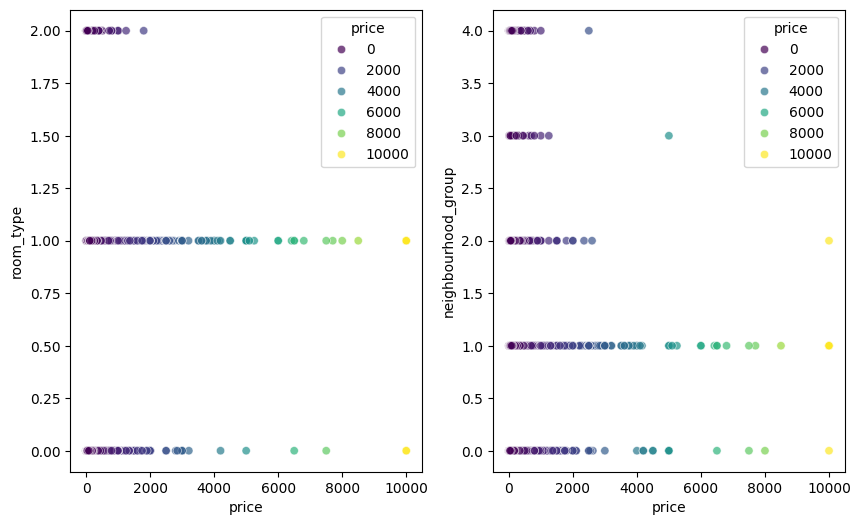

: 

In [ ]:
#Analizamos el precio con el tipo de habitacion y el barrio 

fig, axis = plt.subplots(figsize = (10, 6), ncols = 2)
df_filtrado = df[df['price'] > 0]
sns.scatterplot(ax = axis[0], data=df, x='price', y='room_type', hue='price', palette='viridis', alpha=0.7)
sns.scatterplot(ax = axis[1], data=df, x='price', y='neighbourhood_group', hue='price', palette='viridis', alpha=0.7)

plt.show()

*Variabilidad del precio:* Algunos barrios presentan precios más altos en promedio, lo que podría estar relacionado con su ubicación, demanda turística o calidad de los alojamientos.
- Hay algunos barrios donde la mayoría de los precios son bajos, lo que podría representar zonas menos populares o con menor oferta de alojamientos de lujo.
Como podemos observar hay valores atipicos en el precio, por lo que es recomendable realizar un filtrado de outliers para una mejor visualizacion. 

In [ ]:
# relaciones todos con todos
sns.pairplot(data = df)
plt.show()

En este grafico, podemos observar que algunas pueden reflejar comportamientos válidos, como alojamientos muy populares o anfitriones con muchas propiedades. Tambien valores atipicos, que debemos eliminar para llevar a cabo una mejor investigacion. 

In [ ]:
#Ahora evaluaremos los valores atipicos dentro de nuestro Data set

df_new.describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,7.143982,112.781327
std,240.154170,20.510550,44.550582,32.952519,131.622289
min,0.000000,1.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [ ]:
#Estadistica generales para el precio

price_stats = df_new["price"].describe()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [ ]:

price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = max(0, price_stats["25%"] - 1.5 * price_iqr) #asegurarnos que no sea negativo 
df_new = df_new[df_new["price"] != 0]
print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(price_iqr, 2)}")

The upper and lower limits for finding outliers are 334.0 and -90.0, with an interquartile range of 106.0


In [ ]:
#Los precios que estan por encima de 334
precio_alto = df_new[df_new["price"] > 334]
print(precio_alto)


NameError: name 'df_new' is not defined

In [ ]:
#cuantos alojamientos tienen el precio alto por barrio
precio_alto["neighbourhood_group"].value_counts()

neighbourhood_group
Manhattan        2155
Brooklyn          689
Queens             99
Bronx              21
Staten Island       8
Name: count, dtype: int64

In [ ]:
low = df_new[df_new['price'] <= 300].shape[0]
high = df_new[df_new['price'] >= 500].shape[0]

print("Cuantos alojamientos tienen un precio menor o igual a 300: ", low)
print("Cuantos alojamientos tienen un precio mayor o igual 500: ", high)

Cuantos alojamientos tienen un precio menor o igual a 300:  45527
Cuantos alojamientos tienen un precio mayor o igual 500:  1235


In [ ]:
#Estadisticas generales de estadia minima
nights_stats = df_new["minimum_nights"].describe()
nights_stats

count    48884.000000
mean         7.029887
std         20.512224
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [ ]:
Q1 = df_new["minimum_nights"].quantile(0.25)
Q3 = df_new["minimum_nights"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

4.0


In [ ]:
#Dispersion de estadia minima y valores atipicos en minimun_nights
nights_iqr = nights_stats["75%"] - nights_stats["25%"]
print(f"IQR de estadia minima es:", nights_iqr)
upper_limit = nights_stats["75%"] + 1.5 * nights_iqr
lower_limit = max(0, nights_stats["25%"] - 1.5 * nights_iqr)
#Datos sin outliers
df_clean = df_new[df_new["minimum_nights"] >= 0]
df_clean = df_new[(df_new["minimum_nights"] >= Q1 - 1.5 * IQR) & (df_new["minimum_nights"] <= Q3 + 1.5 * IQR)]
print(f"{round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(nights_iqr, 2)}")

IQR de estadia minima es: 4.0
11.0 and -5.0, with an interquartile range of 4.0


El IQR 4.0 lo que indica es que la mayoría de los valores de estadía mínima están dentro de un rango de 4 noches entre el primer y tercer cuartil.

In [ ]:
estadia_min = df_new[df_new["minimum_nights"] <= 12]
print(estadia_min)

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,9,6,365
1,Manhattan,Entire home/apt,225,1,45,2,355
2,Manhattan,Private room,150,3,0,1,365
3,Brooklyn,Entire home/apt,89,1,270,1,194
4,Manhattan,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...
48890,Brooklyn,Private room,70,2,0,2,9
48891,Brooklyn,Private room,40,4,0,2,36
48892,Manhattan,Entire home/apt,115,10,0,1,27
48893,Manhattan,Shared room,55,1,0,6,2


In [ ]:
#Promedio de estadias dentro del rango de 1 a 12
min_1 = df_new[df_new["minimum_nights"] == 1].shape[0]
min_2 = df_new[df_new["minimum_nights"] >= 2].shape[0]
min_4 = df_new[df_new["minimum_nights"] >= 4].shape[0]
max_7 = df_new[df_new["minimum_nights"] >= 7].shape[0]
max_10 = df_new[df_new["minimum_nights"] >= 12].shape[0]

print(min_1)
print(min_2)
print(min_4)
print(max_7)
print(max_10)

12717
36167
16476
9389
6605


Visualizamos dentro de *mimimum_nights* un promedio de estadia mas frecuente por los clientes, lo cual determinamos que, mayormente todos se hospedan con un minimo de 2 a 3 noches.

In [ ]:
#Vistas al alojamiento
review_stats = df_new["number_of_reviews"].describe()
review_stats

count    48884.000000
mean        23.271991
std         44.551331
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [ ]:
review_iqr = review_stats["75%"] - review_stats["25%"]
print(review_iqr)
upper_limit = review_stats["75%"] + 3 * review_iqr
lower_limit = max(0, review_stats["25%"] - 3 * review_iqr)
print(f"Review a los alojamientos {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(review_iqr, 2)}")

23.0
Review a los alojamientos 93.0 and -68.0, with an interquartile range of 23.0


In [ ]:
anfitriones_list = df_new["calculated_host_listings_count"].describe()
anfitriones_list

count    48884.000000
mean         7.144628
std         32.956185
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [ ]:
#Distribucion de alojamiento por anfitrion y valores atipicos

hostlist_iqr = anfitriones_list["75%"] - anfitriones_list["25%"]
print(hostlist_iqr)
upper_limit = anfitriones_list["75%"] + 3 * hostlist_iqr
lower_limit = max(0, anfitriones_list["25%"] - 3 * hostlist_iqr)

print(f"Lista de anfitriones {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(hostlist_iqr, 2)}")

#Cantidad de alojamientos por anfitrion desde 0 hasta 4

Total_host = sum(1 for x in df["calculated_host_listings_count"] if x in range(0, 5))
host_1 = df[df["calculated_host_listings_count"] == 1].shape[0]
host_2 = df[df["calculated_host_listings_count"] > 2].shape[0]

print(Total_host)
print(host_1)
print(host_2)

1.0
Lista de anfitriones 5.0 and -2.0, with an interquartile range of 1.0
43254
32303
9934


In [ ]:
#Cantidad de alojamiento de anfritriones mayores a 5
Anfitriones = df_new[df_new["calculated_host_listings_count"] > 5]
Anfitriones

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,9,6,365
21,Brooklyn,Private room,130,2,130,6,347
22,Brooklyn,Private room,80,1,39,6,364
23,Brooklyn,Private room,110,2,71,6,304
92,Brooklyn,Private room,98,7,16,6,185
...,...,...,...,...,...,...,...
48851,Queens,Private room,35,1,0,8,341
48857,Queens,Entire home/apt,85,3,0,6,300
48867,Brooklyn,Shared room,25,1,0,6,338
48868,Brooklyn,Shared room,25,7,0,6,365


In [ ]:
#Asignar valores a las categorias que tienen valores indiscretos 
from sklearn.model_selection import train_test_split

X = df_new.drop("price", axis = 1)
y = df_new["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

from sklearn.preprocessing import LabelEncoder
X_train_coded = X_train.copy()
X_test_coded = X_test.copy()

variables = ['room_type', 'neighbourhood_group']

label_encoder_neighbourhood_group = LabelEncoder()
label_encoder_room_type = LabelEncoder()

label_encoder_neighbourhood_group.fit(X_train['neighbourhood_group'])
label_encoder_room_type.fit(X_train['room_type'])

X_train_coded['neighbourhood_group'] = label_encoder_neighbourhood_group.transform(X_train['neighbourhood_group'])
X_train_coded['room_type'] = label_encoder_room_type.transform(X_train['room_type'])

X_test_coded['neighbourhood_group'] = label_encoder_neighbourhood_group.transform(X_test['neighbourhood_group'])
X_test_coded['room_type'] = label_encoder_room_type.transform(X_test['room_type'])

X_train_coded.head()

,neighbourhood_group,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
44559,3,0,3,6,1,37
31363,1,1,5,5,1,0
42274,0,1,2,7,1,70
11756,2,1,14,1,1,0
23350,1,1,1,0,4,0


In [ ]:
#Escalado 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train_coded)

X_train_scal = scaler.transform(X_train_coded)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train_coded.index, columns =X_train_coded.columns )

X_test_scal = scaler.transform(X_test_coded)
X_test_scal = pd.DataFrame(X_test_coded, index = X_test_coded.index, columns =X_train_coded.columns )

X_train_scal.head()

,minimum_nights,calculated_host_listings_count,availability_365
44559,0.001601,0.000000,0.101370
31363,0.003203,0.000000,0.000000
42274,0.000801,0.000000,0.191781
11756,0.010408,0.000000,0.000000
23350,0.000000,0.009202,0.000000


In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse_output=False)
onehot_encoder.fit(X_train[variables])
X_train_cat_ohe = onehot_encoder.transform(X_train[variables])
X_train_cat_ohe = pd.DataFrame(X_train_cat_ohe, index = X_train.index, columns=onehot_encoder.get_feature_names_out(variables))

X_test_cat_ohe = onehot_encoder.transform(X_test[variables])
X_test_cat_ohe = pd.DataFrame(X_test_cat_ohe, index = X_test.index, columns=onehot_encoder.get_feature_names_out(variables))

X_train_cat_ohe.head()

,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
44559,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
31363,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
42274,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
11756,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
23350,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selection_model = SelectKBest(score_func = f_classif, k = 5)

selection_model.fit(X_train_scal, y_train)

ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_scal), columns = X_train_scal.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_scal), columns = X_test_scal.columns.values[ix])

X_train_sel.head()

,calculated_host_listings_count,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighbourhood_group_Manhattan
0,-0.186526,1.0,0.0,0.0,0.0
1,-0.186526,0.0,1.0,0.0,0.0
2,-0.186526,0.0,1.0,0.0,0.0
3,-0.186526,0.0,1.0,0.0,1.0
4,-0.095097,0.0,1.0,0.0,0.0


In [ ]:
selected_features = X_train_scal.columns[selection_model.get_support()]

selected_features

Index(['calculated_host_listings_count', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room',
       'neighbourhood_group_Manhattan'],
      dtype='object')